## IST 718 Lab 3
### Bing-Je Wu

The research question is can we use algorithms and compute to identify clothing items? Specifically, can we determine which algorithm and compute methodology provides us the most efficient approach for classifying simple fashion images?

* Using the base samples available from Zalando Research:  
    + https://github.com/zalandoresearch/fashion-mnist
    + Review the data – clean as appropriate
    + Provide an initial data analysis
        
* Implement at least two approaches for classifying the digits – examples below:
    + Naïve bayes
    + Neural Networks
    + Keras
    + Azure ML
    + IBM DSX
    + Boosted trees
    + Linear classification
    + Your choice
    
* Answer the following questions:
    + What is the accuracy of each method?
    + What are the trade-offs of each approach?
    + What is the compute performance of each approach?

    


Reference links:   
https://www.tensorflow.org/tutorials/keras/classification  

https://stackoverflow.com/questions/40427435/extract-images-from-idx3-ubyte-file-or-gzip-via-python  

http://rasbt.github.io/mlxtend/user_guide/data/loadlocal_mnist/


Datasets:
 1. Fashion-MNIST
 https://github.com/zalandoresearch/fashion-mnist/tree/master/data/fashion

# Outline:
    + Load the dataset
    + Explore the datasets
        - FASHION-MINST 
    * Statistical Analysis
    * Models
        + Linear classification
        + Logistics regression
        + Support vector
        + Naïve bayes
        + K-Nearest Neighbors
        + Random Forest
        + Keras (ANN - Artificial Neural Network)
        + Keras (CNN - Convolutional Neural Network)
    * Final Model
    * Questions
    * Conclusion

# Load the dataset

In [1]:
pip install tensorflow-gpu==2.0.0.alpha0

     |████████████████████████████████| 332.1MB 52kB/s 
     |████████████████████████████████| 3.0MB 20.8MB/s 
     |████████████████████████████████| 419kB 42.8MB/s 


In [2]:
pip install "numpy<1.17"

     |████████████████████████████████| 17.4MB 194kB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.17.5
    Uninstalling numpy-1.17.5:
      Successfully uninstalled numpy-1.17.5


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 300)

In [4]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or 

2.0.0-alpha0


/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:544: FutureWa

In [5]:
# Load the fashion-mnist dataset from keras.datasets library
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


### Normalizing the images

We need to divide each pixel value of the image in the training and test sets by the maximum number of pixel values (255).

In this way each pixel value will be in the range [0, 1]. By normalizing images it can help make sure that models train faster and perform better.

In [0]:
# Normalizing the images
train_images = train_images / 255.0
test_images = test_images /255.0

### Reshaping the dataset

In [7]:
print('Before reshape:')
# training set shape info
print('Shape of the training set (images): {}'.format(train_images.shape))
print('Shape of the training set (labels): {}'.format(train_labels.shape))

# test set shape info
print('Shape of the test set (images): {}'.format(test_images.shape))
print('Shape of the test set (labels): {}'.format(test_labels.shape))

Before reshape:
Shape of the training set (images): (60000, 28, 28)
Shape of the training set (labels): (60000,)
Shape of the test set (images): (10000, 28, 28)
Shape of the test set (labels): (10000,)


In [0]:
# Reshape the training set and the test set to be into the vector format
# Since each image's dimension is 28x28, we reshape the full dataset to [-1 (all elements), height * width]
train_images = train_images.reshape(-1, 28*28)
test_images = test_images.reshape(-1, 28*28)

In [9]:
print('After reshape:')
# training set shape info
print('Shape of the training set (images): {}'.format(train_images.shape))
print('Shape of the training set (labels): {}'.format(train_labels.shape))

# test set shape info
print('Shape of the test set (images): {}'.format(test_images.shape))
print('Shape of the test set (labels): {}'.format(test_labels.shape))

After reshape:
Shape of the training set (images): (60000, 784)
Shape of the training set (labels): (60000,)
Shape of the test set (images): (10000, 784)
Shape of the test set (labels): (10000,)


### Shuffling index

By shuffling the training set, it helps adjust the combination of weights in neural network running in batches.

In [0]:
shuffle_index = np.random.permutation(60000) 
train_images, train_labels = train_images[shuffle_index], train_labels[shuffle_index]

# Explore the datasets


In [0]:
label = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 
         'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boo']
label_encode = [0,1,2,3,4,5,6,7,8,9]

What the outcomes look like?

##### Sinle item

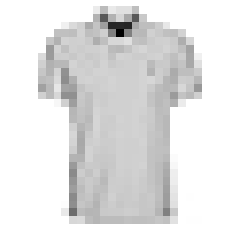

In [12]:
# Sinle item
cloth = train_images[48765] # select a random number between [0,60000)
# Each image id 28 pixel * 28 pixel; 
# thus, the record needs to be reshape to 28*28 to help visualization
cloth_image = cloth.reshape(28,28)
plt.imshow(cloth_image, cmap = plt.cm.binary, interpolation="nearest")
plt.axis("off") # trun off the axises
plt.show()

##### Each of the item

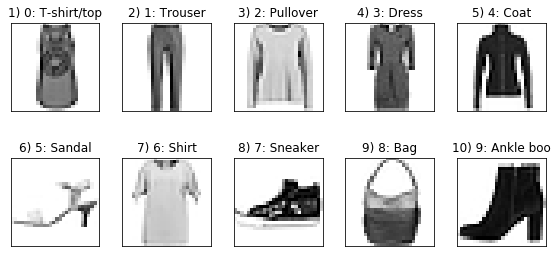

In [13]:
# Each of the item
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,
                       figsize=(8,4) )
ax = ax.flatten()
for i in range(10):
    img = train_images[train_labels == i][0].reshape(28,28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title('{}) {}: {}'.format(i+1, label_encode[i], label[i]))

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.savefig('cloth_mnist_all.png', dpi=300)
plt.show()

##### Variation of an item

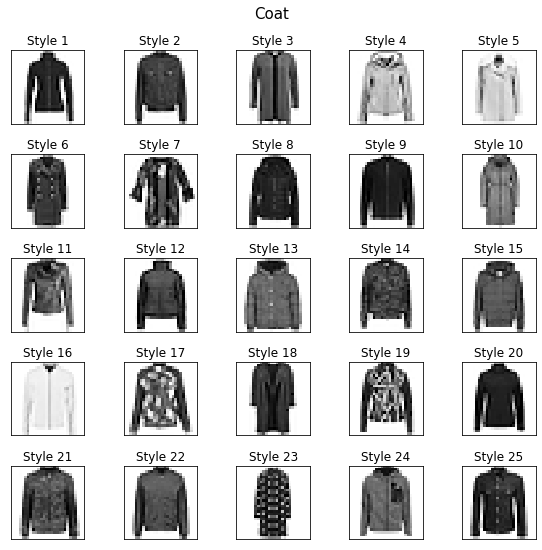

In [14]:
# Variation of an item (Coat)
fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True,
                       figsize=(8,8))
ax = ax.flatten()
for i in range(25):
    img = train_images[train_labels == 4][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title('Style {}'.format(i+1))

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.suptitle('Coat', fontsize=15)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('cloth_mnist_coat.png', dpi=300)
plt.show()

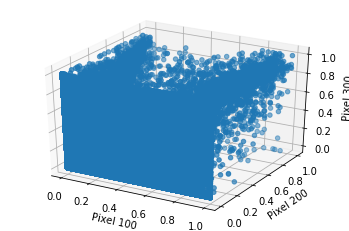

In [15]:
# portion of 3d plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(train_images[:,99], train_images[:,199], train_images[:,299])

ax.set_xlabel('Pixel 100')
ax.set_ylabel('Pixel 200')
ax.set_zlabel('Pixel 300')

plt.show()

# Statistical Analysis

## Outcome Distribution

### Create lables_df (entire dataset)

In [0]:
labels_dic = {0:'T-shirt/top', 1:'Trouser', 2:'Pullover', 3:'Dress', 4:'Coat', 5:'Sandal', 
              6:'Shirt', 7:'Sneaker', 8:'Bag', 9:'Ankle boo'}

In [0]:
labels_df = pd.DataFrame(pd.concat([pd.Series(train_labels),pd.Series(test_labels)]) , columns=['outcome'])
labels_df['label'] = labels_df['outcome'].map(labels_dic)

In [18]:
labels_df.head()

,outcome,label
0,5,Sandal
1,4,Coat
2,6,Shirt
3,7,Sneaker
4,4,Coat


### Create label_df_train

In [0]:
labels_df_train = pd.DataFrame(train_labels , columns=['outcome'])
labels_df_train['label'] = labels_df_train['outcome'].map(labels_dic)

### Create label_df_test

In [0]:
labels_df_test = pd.DataFrame(test_labels , columns=['outcome'])
labels_df_test['label'] = labels_df_test['outcome'].map(labels_dic)

### Create plots

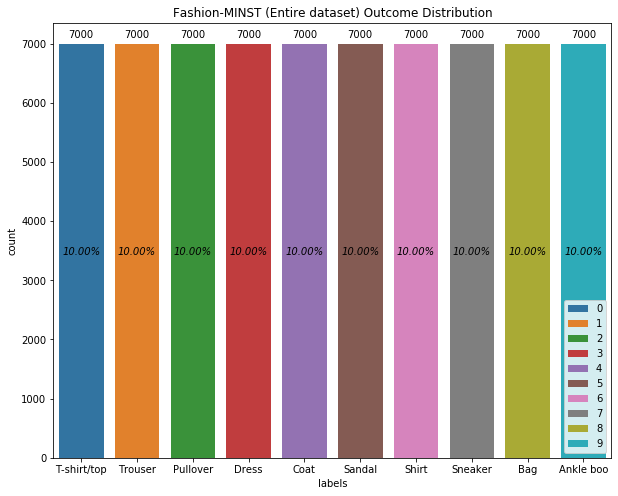

In [21]:
# Control plt figure size
plt.figure(figsize=(10,8))

# Plot the countplot
ax=sns.countplot(x='outcome', hue='outcome',data=labels_df, dodge=False,
                 hue_order=[0,1,2,3,4,5,6,7,8,9] ,
                 order=[0,1,2,3,4,5,6,7,8,9]
                 )

# set title of the plot, x-axis label, xticklabels, and legend
ax.set_title('Fashion-MINST (Entire dataset) Outcome Distribution');
ax.legend(loc='lower right')
ax.set_xticklabels(['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 
          'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boo'])
ax.set_xlabel('labels')

# annotate the count/percentage of each column
total = (labels_df).shape[0]
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height()/total)
    coutns = '{:.0f}'.format(p.get_height())
    x = p.get_x() + p.get_width()/2
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y/2), ha='center', va='center_baseline',style='italic')
    ax.annotate(coutns, (x, y+100), ha='center', va='baseline')

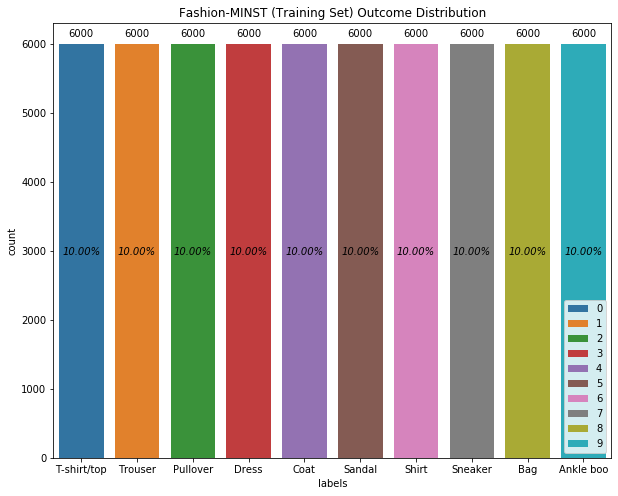

In [22]:
# Control plt figure size
plt.figure(figsize=(10,8))

# Plot the countplot
ax=sns.countplot(x='outcome', hue='outcome',data=labels_df_train, dodge=False,
                 hue_order=[0,1,2,3,4,5,6,7,8,9] ,
                 order=[0,1,2,3,4,5,6,7,8,9]
                 )

# set title of the plot, x-axis label, xticklabels, and legend
ax.set_title('Fashion-MINST (Training Set) Outcome Distribution');
ax.legend(loc='lower right')
ax.set_xticklabels(['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 
          'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boo'])
ax.set_xlabel('labels')

# annotate the count/percentage of each column
total = (labels_df_train).shape[0]
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height()/total)
    coutns = '{:.0f}'.format(p.get_height())
    x = p.get_x() + p.get_width()/2
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y/2), ha='center', va='center_baseline',style='italic')
    ax.annotate(coutns, (x, y+100), ha='center', va='baseline')

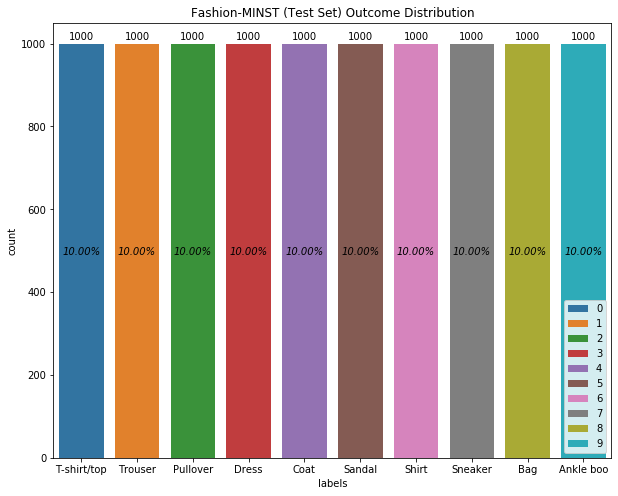

In [23]:
# Control plt figure size
plt.figure(figsize=(10,8))

# Plot the countplot
ax=sns.countplot(x='outcome', hue='outcome',data=labels_df_test, dodge=False,
                 hue_order=[0,1,2,3,4,5,6,7,8,9] ,
                 order=[0,1,2,3,4,5,6,7,8,9]
                 )

# set title of the plot, x-axis label, xticklabels, and legend
ax.set_title('Fashion-MINST (Test Set) Outcome Distribution');
ax.legend(loc='lower right')
ax.set_xticklabels(['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 
          'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boo'])
ax.set_xlabel('labels')

# annotate the count/percentage of each column
total = (labels_df_test).shape[0]
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height()/total)
    coutns = '{:.0f}'.format(p.get_height())
    x = p.get_x() + p.get_width()/2
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y/2), ha='center', va='center_baseline',style='italic')
    ax.annotate(coutns, (x, y+10), ha='center', va='baseline')

Each category is evenly distributed within the training set and test set.

# Models

## Linear classification

In [0]:
from sklearn import linear_model
lclf = linear_model.SGDClassifier(max_iter=1000)

In [25]:
start = time.time()

lclf_fit = lclf.fit(train_images, train_labels)

end = time.time()
final_time = end-start
print('\n')
print('Training time:{}'.format(final_time))



Training time:31.080594778060913


In [26]:
start = time.time()

lclf_pred = lclf.predict(test_images)

end = time.time()
final_time = end-start
print('\n')
print('Testing time:{}'.format(final_time))



Testing time:0.035745859146118164


In [27]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test_labels, lclf_pred)
print(confusion_matrix)

[[770   5  22  19   1   4 168   0  11   0]
 [  4 962   8  17   1   0   5   1   2   0]
 [ 14   3 771   4  56   0 144   1   7   0]
 [ 41  32  27 749   9   0 134   0   8   0]
 [  1   5 179  20 482   0 303   0  10   0]
 [  3   0   2   0   0 919   0  43  11  22]
 [111   2 136  17  37   0 676   0  21   0]
 [  1   0   0   0   0  38   0 913   2  46]
 [  5   1   7   6   1   7  31   3 938   1]
 [  1   1   0   2   0  33   4  35   1 923]]


In [28]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(test_labels, lclf_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8097    0.7700    0.7893      1000
           1     0.9515    0.9620    0.9567      1000
           2     0.6693    0.7710    0.7165      1000
           3     0.8981    0.7490    0.8168      1000
           4     0.8211    0.4820    0.6074      1000
           5     0.9181    0.9190    0.9185      1000
           6     0.4614    0.6760    0.5485      1000
           7     0.9167    0.9130    0.9148      1000
           8     0.9278    0.9380    0.9329      1000
           9     0.9304    0.9230    0.9267      1000

    accuracy                         0.8103     10000
   macro avg     0.8304    0.8103    0.8128     10000
weighted avg     0.8304    0.8103    0.8128     10000



In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(test_labels, lclf_pred)

0.8103

## Logistics regression

In [0]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs', max_iter=10000)

In [31]:
start = time.time()

logreg_fit = logreg.fit(train_images, train_labels)

end = time.time()
final_time = end-start
print('\n')
print('Training time:{}'.format(final_time))



Training time:751.8370032310486


In [32]:
start = time.time()

logreg_pred = logreg.predict(test_images)

end = time.time()
final_time = end-start
print('\n')
print('Testing time:{}'.format(final_time))



Testing time:0.030037879943847656


In [33]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test_labels, logreg_pred)
print(confusion_matrix)

[[806   2  11  53   4   2 111   0  11   0]
 [  4 958   3  25   4   0   3   1   2   0]
 [ 24   4 739  10 124   0  86   1  12   0]
 [ 24  17  18 861  30   0  39   0  11   0]
 [  0   2 115  36 763   0  77   0   7   0]
 [  0   0   0   1   0 922   0  48   7  22]
 [143   2 123  38 100   0 571   0  23   0]
 [  0   0   0   0   0  35   0 939   0  26]
 [  7   1   7  14   5   6  21   5 934   0]
 [  0   1   0   0   0  12   1  38   0 948]]


In [34]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(test_labels, logreg_pred, digits=4))

              precision    recall  f1-score   support

           0     0.7996    0.8060    0.8028      1000
           1     0.9706    0.9580    0.9643      1000
           2     0.7274    0.7390    0.7331      1000
           3     0.8295    0.8610    0.8449      1000
           4     0.7408    0.7630    0.7517      1000
           5     0.9437    0.9220    0.9327      1000
           6     0.6282    0.5710    0.5982      1000
           7     0.9099    0.9390    0.9242      1000
           8     0.9275    0.9340    0.9307      1000
           9     0.9518    0.9480    0.9499      1000

    accuracy                         0.8441     10000
   macro avg     0.8429    0.8441    0.8433     10000
weighted avg     0.8429    0.8441    0.8433     10000



In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(test_labels, logreg_pred)

0.8441

## Support vector

In [0]:
from sklearn.svm import SVC
svc= SVC()

In [37]:
start = time.time()

svc_fit = svc.fit(train_images, train_labels)

end = time.time()
final_time = end-start
print('\n')
print('Training time:{}'.format(final_time))



Training time:579.6898975372314


In [38]:
start = time.time()

svc_pred = svc.predict(test_images)

end = time.time()
final_time = end-start
print('\n')
print('Testing time:{}'.format(final_time))



Testing time:207.91561722755432


In [39]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test_labels, svc_pred)
print(confusion_matrix)

[[857   0  16  28   3   2  85   0   9   0]
 [  4 962   2  25   3   0   4   0   0   0]
 [ 11   2 816  16  88   0  65   0   2   0]
 [ 27   3  11 890  33   0  32   0   4   0]
 [  1   1  87  32 815   0  61   0   3   0]
 [  0   0   0   1   0 951   0  33   1  14]
 [135   1 103  27  68   0 655   0  11   0]
 [  0   0   0   0   0  21   0 955   0  24]
 [  3   1   1   5   2   2   4   5 977   0]
 [  0   0   0   0   0  11   1  37   0 951]]


In [40]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(test_labels, svc_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8256    0.8570    0.8410      1000
           1     0.9918    0.9620    0.9766      1000
           2     0.7876    0.8160    0.8016      1000
           3     0.8691    0.8900    0.8794      1000
           4     0.8053    0.8150    0.8101      1000
           5     0.9635    0.9510    0.9572      1000
           6     0.7222    0.6550    0.6869      1000
           7     0.9272    0.9550    0.9409      1000
           8     0.9702    0.9770    0.9736      1000
           9     0.9616    0.9510    0.9563      1000

    accuracy                         0.8829     10000
   macro avg     0.8824    0.8829    0.8824     10000
weighted avg     0.8824    0.8829    0.8824     10000



In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(test_labels, svc_pred)

0.8829

## Naïve bayes


In [0]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [43]:
start = time.time()

gnb_fit = gnb.fit(train_images, train_labels)

end = time.time()
final_time = end-start
print('\n')
print('Training time:{}'.format(final_time))



Training time:0.6993002891540527


In [44]:
start = time.time()

gnb_pred = gnb.predict(test_images)

end = time.time()
final_time = end-start
print('\n')
print('Testing time:{}'.format(final_time))



Testing time:0.5419938564300537


In [45]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test_labels, gnb_pred)
print(confusion_matrix)

[[586  64  29 162 110   0  20   0  29   0]
 [  1 939  14  36   7   0   1   0   2   0]
 [  7  14 324  65 545   0  23   0  22   0]
 [  9 387   6 545  43   0   4   0   6   0]
 [  0  34  44 131 779   0   4   0   8   0]
 [  0   0   1   1   0 278   3 660   5  52]
 [117  34 112 200 435   0  40   0  62   0]
 [  0   0   0   0   0   3   0 988   0   9]
 [  0   2  19  85 149   3  27   4 710   1]
 [  0   0   1   1   0  16   3 304   8 667]]


In [46]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(test_labels, gnb_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8139    0.5860    0.6814      1000
           1     0.6370    0.9390    0.7591      1000
           2     0.5891    0.3240    0.4181      1000
           3     0.4445    0.5450    0.4897      1000
           4     0.3767    0.7790    0.5078      1000
           5     0.9267    0.2780    0.4277      1000
           6     0.3200    0.0400    0.0711      1000
           7     0.5051    0.9880    0.6685      1000
           8     0.8333    0.7100    0.7667      1000
           9     0.9150    0.6670    0.7715      1000

    accuracy                         0.5856     10000
   macro avg     0.6361    0.5856    0.5562     10000
weighted avg     0.6361    0.5856    0.5562     10000



In [47]:
from sklearn.metrics import accuracy_score
accuracy_score(test_labels, gnb_pred)

0.5856

## K-Nearest Neighbors

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [49]:
start = time.time()

knn.fit(train_images, train_labels)

end = time.time()
final_time = end-start
print('\n')
print('Training time:{}'.format(final_time))



Training time:11.35332727432251


In [50]:
start = time.time()

knn_pred = knn.predict(test_images)

end = time.time()
final_time = end-start
print('\n')
print('Testing time:{}'.format(final_time))



Testing time:771.0947904586792


In [51]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test_labels, knn_pred)
print(confusion_matrix)

[[855   1  17  16   3   1 100   1   6   0]
 [  8 968   4  12   4   0   3   0   1   0]
 [ 24   2 819  11  75   0  69   0   0   0]
 [ 41   8  15 860  39   0  34   0   3   0]
 [  2   1 126  26 773   0  71   0   1   0]
 [  1   0   0   0   0 822   5  96   1  75]
 [176   1 132  23  80   0 575   0  13   0]
 [  0   0   0   0   0   3   0 961   0  36]
 [  2   0  10   4   7   0  16   7 953   1]
 [  0   0   0   0   0   2   1  29   0 968]]


In [52]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(test_labels, knn_pred, digits=4))

              precision    recall  f1-score   support

           0     0.7710    0.8550    0.8108      1000
           1     0.9867    0.9680    0.9773      1000
           2     0.7293    0.8190    0.7715      1000
           3     0.9034    0.8600    0.8811      1000
           4     0.7880    0.7730    0.7804      1000
           5     0.9928    0.8220    0.8993      1000
           6     0.6579    0.5750    0.6137      1000
           7     0.8784    0.9610    0.9179      1000
           8     0.9744    0.9530    0.9636      1000
           9     0.8963    0.9680    0.9308      1000

    accuracy                         0.8554     10000
   macro avg     0.8578    0.8554    0.8546     10000
weighted avg     0.8578    0.8554    0.8546     10000



In [53]:
from sklearn.metrics import accuracy_score
accuracy_score(test_labels, knn_pred)

0.8554

## Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier 
forest = RandomForestClassifier(n_estimators = 100)

In [55]:
start = time.time()

forest.fit(train_images, train_labels)

end = time.time()
final_time = end-start
print('\n')
print('Training time:{}'.format(final_time))



Training time:81.60474896430969


In [56]:
start = time.time()

forest_pred = forest.predict(test_images)

end = time.time()
final_time = end-start
print('\n')
print('Testing time:{}'.format(final_time))



Testing time:0.4056282043457031


In [57]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test_labels, forest_pred)
print(confusion_matrix)

[[862   0  11  31   2   1  83   0  10   0]
 [  3 961   2  21   5   0   6   0   2   0]
 [ 12   0 803  10 117   0  54   0   4   0]
 [ 18   2  11 909  30   0  28   0   2   0]
 [  1   0  94  33 820   0  50   0   2   0]
 [  0   0   0   1   0 956   0  32   1  10]
 [155   1 117  28  91   0 592   0  16   0]
 [  0   0   0   0   0  17   0 949   0  34]
 [  1   1   6   2   5   2   7   4 972   0]
 [  0   0   0   0   0  11   0  41   3 945]]


In [58]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(test_labels, forest_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8194    0.8620    0.8402      1000
           1     0.9959    0.9610    0.9781      1000
           2     0.7692    0.8030    0.7857      1000
           3     0.8783    0.9090    0.8934      1000
           4     0.7664    0.8200    0.7923      1000
           5     0.9686    0.9560    0.9623      1000
           6     0.7220    0.5920    0.6505      1000
           7     0.9250    0.9490    0.9368      1000
           8     0.9605    0.9720    0.9662      1000
           9     0.9555    0.9450    0.9502      1000

    accuracy                         0.8769     10000
   macro avg     0.8760    0.8769    0.8756     10000
weighted avg     0.8760    0.8769    0.8756     10000



In [59]:
from sklearn.metrics import accuracy_score
accuracy_score(test_labels, forest_pred)

0.8769

## Keras (ANN)
( ANN - Artificial Neural Network)

### Defining the model

In [0]:
# Define an object of the Sequential model
ANN = tf.keras.Sequential()

### Adding a first fully-connected hidden layer

```
Layer hyper-parameters:
- number of units/neurons: 128
- activation function: ReLU
- input_shape: (784, )
```



In [0]:
ANN.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape=(784, )))

### Adding a second layer with Dropout

Dropout is a Regularization technique where we randomly set neurons in a layer to zero. That way while training those neurons won't be updated. Because some percentage of neurons won't be updated the whole training process is long and we have less chance for overfitting.

In [0]:
ANN.add(tf.keras.layers.Dropout(0.2))

### Adding more layers

In [0]:
ANN.add(tf.keras.layers.Dense(units=64, activation='relu'))
ANN.add(tf.keras.layers.Dropout(0.2))
ANN.add(tf.keras.layers.Dense(units=64, activation='linear'))

### Adding the output layer

```
- units: number of classes (10 in the Fashion MNIST dataset)
- activation: softmax
```



In [0]:
ANN.add(tf.keras.layers.Dense(units=10, activation='softmax'))

### Compiling the model

```
- Optimizer: Adam
- Loss: Sparse softmax (categorical) crossentropy 
```

List of loss function: https://keras.io/losses/

In [0]:
ANN.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics=['sparse_categorical_accuracy'])

In [66]:
ANN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 113,546
Trainable params: 113,546
Non-trainable params: 0
__________________________________________________

### Training the model

In [67]:
start = time.time()

ANN.fit(train_images, train_labels, epochs=30)

end = time.time()
final_time = end-start
print('\n')
print('Training time:{}'.format(final_time))

Epoch 1/30
60000/60000 [==============================] - 12s 197us/sample - loss: 0.5758 - sparse_categorical_accuracy: 0.7915
Epoch 2/30
60000/60000 [==============================] - 11s 177us/sample - loss: 0.4413 - sparse_categorical_accuracy: 0.8401
Epoch 3/30
60000/60000 [==============================] - 10s 175us/sample - loss: 0.4027 - sparse_categorical_accuracy: 0.8542
Epoch 4/30
60000/60000 [==============================] - 11s 176us/sample - loss: 0.3849 - sparse_categorical_accuracy: 0.8604
Epoch 5/30
60000/60000 [==============================] - 11s 180us/sample - loss: 0.3658 - sparse_categorical_accuracy: 0.8677
Epoch 6/30
60000/60000 [==============================] - 10s 173us/sample - loss: 0.3537 - sparse_categorical_accuracy: 0.8707
Epoch 7/30
60000/60000 [==============================] - 10s 173us/sample - loss: 0.3403 - sparse_categorical_accuracy: 0.8753
Epoch 8/30
60000/60000 [==============================] - 10s 175us/sample - loss: 0.3355 - sparse_categ

### Model evaluation and prediction

In [68]:
 start = time.time()

ANN_pred= ANN.predict_classes(test_images)

end = time.time()
final_time = end-start
print('\n')
print('Testing time:{}'.format(final_time))



Testing time:0.4532601833343506


In [69]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test_labels, ANN_pred)
print(confusion_matrix)

[[789   2   9  52   9   1 129   0   9   0]
 [  0 975   1  17   4   0   2   0   1   0]
 [ 16   2 797  12 111   0  61   0   1   0]
 [ 17   6   8 908  41   0  16   0   4   0]
 [  0   1  81  28 848   0  40   0   2   0]
 [  0   0   0   0   0 959   0  24   1  16]
 [ 78   1  88  46  78   0 698   0  11   0]
 [  0   0   0   0   0  13   0 974   0  13]
 [  1   0   0   6   3   1   7   3 979   0]
 [  0   0   0   0   0   7   1  52   0 940]]


In [70]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(test_labels, ANN_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8757    0.7890    0.8301      1000
           1     0.9878    0.9750    0.9814      1000
           2     0.8100    0.7970    0.8034      1000
           3     0.8494    0.9080    0.8777      1000
           4     0.7751    0.8480    0.8099      1000
           5     0.9776    0.9590    0.9682      1000
           6     0.7317    0.6980    0.7144      1000
           7     0.9250    0.9740    0.9489      1000
           8     0.9712    0.9790    0.9751      1000
           9     0.9701    0.9400    0.9548      1000

    accuracy                         0.8867     10000
   macro avg     0.8874    0.8867    0.8864     10000
weighted avg     0.8874    0.8867    0.8864     10000



In [71]:
test_loss, test_accuracy = ANN.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 91us/sample - loss: 0.3291 - sparse_categorical_accuracy: 0.8867


In [72]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.8866999745368958


## Keras (CNN)
( CNN - Convolutional Neural Network)

### Data for CNN


When using a convolutional layer as the first layer to the CNN model, we need to reshape our data to (n_images, x_shape, y_shape, channels). We should set channels to 1 for grayscale images and set channels to 3 when we have a set of RGB-images as input.

#### Load dataset

In [0]:
# Load the fashion-mnist dataset from keras.datasets library
fashion_mnist = keras.datasets.fashion_mnist
(CNN_train_images, CNN_train_labels), (CNN_test_images, CNN_test_labels) = fashion_mnist.load_data()

#### Normalizing the images

In [0]:
# Normalizing the images
CNN_train_images = CNN_train_images / 255.0
CNN_test_images = CNN_test_images /255.0

#### Reshaping the dataset
To feed in the dataset into a convolutional nerual network, the dataset must at least in grayscale.

In [75]:
print('Before reshape:')
# training set shape info
print('Shape of the training set (images): {}'.format(CNN_train_images.shape))
print('Shape of the training set (labels): {}'.format(CNN_train_labels.shape))

# test set shape info
print('Shape of the test set (images): {}'.format(CNN_test_images.shape))
print('Shape of the test set (labels): {}'.format(CNN_test_labels.shape))

Before reshape:
Shape of the training set (images): (60000, 28, 28)
Shape of the training set (labels): (60000,)
Shape of the test set (images): (10000, 28, 28)
Shape of the test set (labels): (10000,)


In [0]:
# Reshape the training set and the test set to be into the vector format
# Since each image's dimension is 28x28, we reshape the full dataset to [-1 (all elements), height * width]
CNN_train_images = CNN_train_images.reshape(-1, 28,28, 1)
CNN_test_images = CNN_test_images.reshape(-1, 28,28, 1)

In [77]:
print('After reshape:')
# training set shape info
print('Shape of the training set (images): {}'.format(CNN_train_images.shape))
print('Shape of the training set (labels): {}'.format(CNN_train_labels.shape))

# test set shape info
print('Shape of the test set (images): {}'.format(CNN_test_images.shape))
print('Shape of the test set (labels): {}'.format(CNN_test_labels.shape))

After reshape:
Shape of the training set (images): (60000, 28, 28, 1)
Shape of the training set (labels): (60000,)
Shape of the test set (images): (10000, 28, 28, 1)
Shape of the test set (labels): (10000,)


### Shuffling index

In [0]:
shuffle_index = np.random.permutation(60000) 
CNN_train_images, CNN_train_labels = CNN_train_images[shuffle_index], CNN_train_labels[shuffle_index]

### Defining the model

In [0]:
CNN = tf.keras.models.Sequential()

### Adding the first CNN Layer

CNN layer hyper-parameters:
```
- filters: 32
- kernel_size: (3,3)
- padding: same
- activation: relu
- input_shape: (28, 28, 1)
```





*Filters: the number of feauters are going to be used for convolving (filtering)
the input*  
*Kernel_size: the size of the filter*

*Padding='Valid':*	            
*   No padding	
*   Dimensions reduce

*Padding='Same':* 	
*   Zeros around the edges
*   Dimensions stay the same    



Conv1D is used for input signals which are similar to the voice. By employing them you can find patterns across the signal.  
Example: 1 second stereo voice signal sampled at 44100 Hz, shape: (batch_size,  44100, 2)

Conv2D is used for images. This use case is very popular. The convolution method used for this layer is so called convolution over volume. This means you have a two-dimensional image which contains multiple channels, RGB as an example. In this case, each convolutional filter should be a three-dimensional filter to be convolved, cross-correlated actually, with the image to find appropriate patterns across the image.  
Example: 32x32 RGB image, shape: (batch_size, 32, 32, 3)

Conv3D is usually used for videos where you have a frame for each time span. These layers usually have more parameters to be learnt than the previous layers. The reason we call them 3D is that other than images for each frame, there is another axis called time containing discrete values, and each of them corresponds to a particular frame.  
Example: 1 second video of 32x32 RGB images at 24 fps, shape: (batch_size, 32, 32, 3, 24)

In [0]:
CNN.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu", input_shape=[28, 28, 1]))

### Adding the second CNN Layer and max pool layer

CNN layer hyper-parameters:

```
- filters: 32
- kernel_size: (3,3)
- padding: same
- activation: relu
```



MaxPool layer hyper-parameters:
```
- pool_size: (2,2)
- strides: 2
- padding: valid
```




In [0]:
CNN.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))

In [0]:
CNN.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))

### Adding the third CNN Layer

CNN layer hyper-parameters:

    filters: 64
    kernel_size: (3,3)
    padding: same
    activation: relu

In [0]:
CNN.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))

###  Adding the fourth CNN Layer and max pool layer

CNN layer hyper-parameters:

    filters: 64
    kernel_size: (3,3)
    padding: same
    activation: relu

MaxPool layer hyper-parameters:

    pool_size: (2,2)
    strides: 2
    padding: valid

In [0]:
CNN.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))

In [0]:
CNN.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))

### Adding the Flatten layer

In [0]:
CNN.add(tf.keras.layers.Flatten())

### Adding the first Dense layer

Dense layer hyper-parameters:
- units/neurons: 128
- activation: relu

In [0]:
CNN.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Adding the more Dense layer

In [0]:
CNN.add(tf.keras.layers.Dropout(0.4))
CNN.add(tf.keras.layers.Dense(units=64, activation='relu'))
CNN.add(tf.keras.layers.Dropout(0.2))
CNN.add(tf.keras.layers.Dense(units=32, activation='relu'))

### Adding the last Dense layer (output layer)

Dense layer hyper-parameters:

 - units/neurons: 10 (number of classes)
 - activation: softmax

In [0]:
CNN.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [90]:
CNN.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)             

### Compiling the model

#### sparse_categorical_accuracy
sparse_categorical_accuracy checks to see if the maximal true value is equal to the index of the maximal predicted value.

https://stackoverflow.com/questions/44477489/keras-difference-between-categorical-accuracy-and-sparse-categorical-accuracy 

In [0]:
CNN.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam", metrics=["sparse_categorical_accuracy"])

### Training the model

In [92]:
start = time.time()

CNN.fit(CNN_train_images, CNN_train_labels, epochs=30)

end = time.time()
final_time = end-start
print('\n')
print('Training time:{}'.format(final_time))

Epoch 1/30
60000/60000 [==============================] - 30s 497us/sample - loss: 0.5787 - sparse_categorical_accuracy: 0.7905
Epoch 2/30
60000/60000 [==============================] - 25s 411us/sample - loss: 0.3433 - sparse_categorical_accuracy: 0.8794
Epoch 3/30
60000/60000 [==============================] - 25s 422us/sample - loss: 0.2829 - sparse_categorical_accuracy: 0.9014
Epoch 4/30
60000/60000 [==============================] - 25s 415us/sample - loss: 0.2491 - sparse_categorical_accuracy: 0.9118
Epoch 5/30
60000/60000 [==============================] - 25s 412us/sample - loss: 0.2247 - sparse_categorical_accuracy: 0.9190
Epoch 6/30
60000/60000 [==============================] - 25s 411us/sample - loss: 0.2075 - sparse_categorical_accuracy: 0.9269
Epoch 7/30
60000/60000 [==============================] - 24s 405us/sample - loss: 0.1909 - sparse_categorical_accuracy: 0.9326
Epoch 8/30
60000/60000 [==============================] - 25s 410us/sample - loss: 0.1789 - sparse_categ

### Model evaluation and prediction

In [93]:
 start = time.time()

CNN_pred= CNN.predict_classes(CNN_test_images)

end = time.time()
final_time = end-start
print('\n')
print('Testing time:{}'.format(final_time))



Testing time:1.047379493713379


In [94]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(CNN_test_labels, CNN_pred)
print(confusion_matrix)

[[897   1  14   8   1   0  75   0   4   0]
 [  0 985   0   9   0   0   4   0   2   0]
 [ 18   2 909   8  32   0  30   0   1   0]
 [ 23   0  11 933   9   0  23   0   1   0]
 [  0   0  59  28 871   0  41   0   1   0]
 [  0   0   0   0   0 978   0  13   0   9]
 [118   2  47  22  66   0 740   0   5   0]
 [  0   0   0   0   0   8   0 982   0  10]
 [  1   0   0   4   1   2   1   1 990   0]
 [  0   0   0   0   0   5   1  27   0 967]]


In [95]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(CNN_test_labels, CNN_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8486    0.8970    0.8721      1000
           1     0.9949    0.9850    0.9899      1000
           2     0.8740    0.9090    0.8912      1000
           3     0.9219    0.9330    0.9274      1000
           4     0.8888    0.8710    0.8798      1000
           5     0.9849    0.9780    0.9814      1000
           6     0.8087    0.7400    0.7728      1000
           7     0.9599    0.9820    0.9708      1000
           8     0.9861    0.9900    0.9880      1000
           9     0.9807    0.9670    0.9738      1000

    accuracy                         0.9252     10000
   macro avg     0.9249    0.9252    0.9247     10000
weighted avg     0.9249    0.9252    0.9247     10000



In [96]:
test_loss, test_accuracy = CNN.evaluate(CNN_test_images, CNN_test_labels)

10000/10000 [==============================] - 1s 141us/sample - loss: 0.2955 - sparse_categorical_accuracy: 0.9252


In [97]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.9251999855041504


# Final Model

In [0]:
algorithm = ['Linear Classification', 'Logistics Regression', 'Support Vector', 'Naïve Bayes', 'K-Nearest Neighbors', 'Random Forest', 
             'ANN (Artificial Neural Network)', 'CNN (Convolutional Neural Network)'] 
training = [31.0805, 751.8370, 579.6898, 0.6993, 11.3533, 81.6047, 
            318.2523, 752.3904]
testing = [0.0357, 0.0300, 207.9156, 0.5419, 771.0947, 0.4056, 
           0.4532, 1.0473]
score = np.array([0.8103, 0.8441, 0.8829, 0.5856, 0.8554, 0.8769, 
                  0.8867, 0.9251])*100

In [0]:
performance_df = pd.DataFrame({'Algorithm':algorithm, 'Training':training, 'Testing':testing, 'Score':score})
performance_df.sort_values(by=['Score'], axis=0, ascending=False, inplace=True)
performance_df['Rank']=(1,2,3,4,5,6,7,8)

In [6]:
# convert the dataframe to long data
df_melt = pd.melt(performance_df, id_vars=['Algorithm','Score','Rank'], value_vars=['Training','Testing'],
             var_name='data', value_name='Cost')
df_melt

,Algorithm,Score,Rank,data,Cost
0,CNN (Convolutional Neural Network),92.51,1,Training,752.3904
1,ANN (Artificial Neural Network),88.67,2,Training,318.2523
2,Support Vector,88.29,3,Training,579.6898
3,Random Forest,87.69,4,Training,81.6047
4,K-Nearest Neighbors,85.54,5,Training,11.3533
5,Logistics Regression,84.41,6,Training,751.8370
6,Linear Classification,81.03,7,Training,31.0805
7,Naïve Bayes,58.56,8,Training,0.6993
8,CNN (Convolutional Neural Network),92.51,1,Testing,1.0473
9,ANN (Artificial Neural Network),88.67,2,Testing,0.4532


In [7]:
# add total cost feature
performance_df['Total cost'] = performance_df['Training'] + performance_df['Testing']
performance_df

,Algorithm,Training,Testing,Score,Rank,Total cost
7,CNN (Convolutional Neural Network),752.3904,1.0473,92.51,1,753.4377
6,ANN (Artificial Neural Network),318.2523,0.4532,88.67,2,318.7055
2,Support Vector,579.6898,207.9156,88.29,3,787.6054
5,Random Forest,81.6047,0.4056,87.69,4,82.0103
4,K-Nearest Neighbors,11.3533,771.0947,85.54,5,782.4480
1,Logistics Regression,751.8370,0.0300,84.41,6,751.8670
0,Linear Classification,31.0805,0.0357,81.03,7,31.1162
3,Naïve Bayes,0.6993,0.5419,58.56,8,1.2412


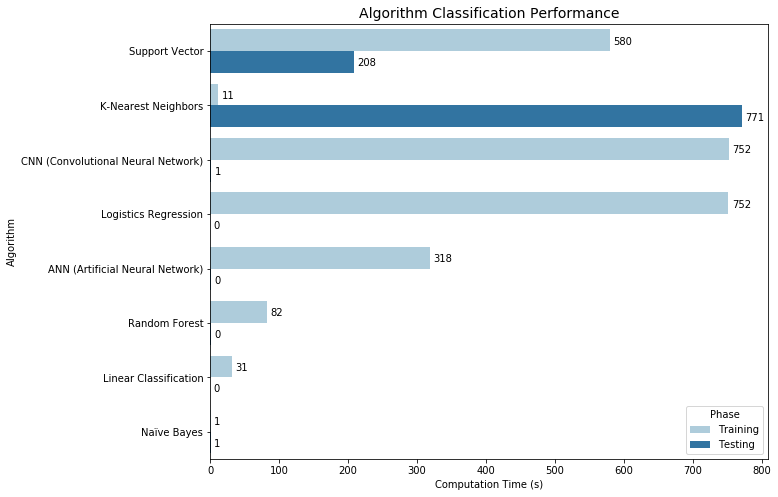

In [8]:
# Control plt figure size
plt.figure(figsize=(10,8))

# Plot the countplot
ax=sns.barplot(y='Algorithm', x='Cost', data=df_melt, hue='data', palette=sns.color_palette("Paired"), dodge=True
               ,order = performance_df.sort_values(by=['Total cost'], axis=0, ascending=False)['Algorithm'].values
               )

# set title of the plot, x-axis label, xticklabels, and legend
ax.set_title('Algorithm Classification Performance', fontsize=14);
ax.legend(loc='lower right', title="Phase", fancybox=True)
ax.set_xlabel('Computation Time (s)')

# annotate the time of each column
for p in ax.patches:
    time = '{:.0f}'.format(p.get_width())
    x = p.get_x() + p.get_width()
    y = p.get_y() + p.get_height()/2
    ax.annotate(time, (x+5, y), ha='left', va='center_baseline')

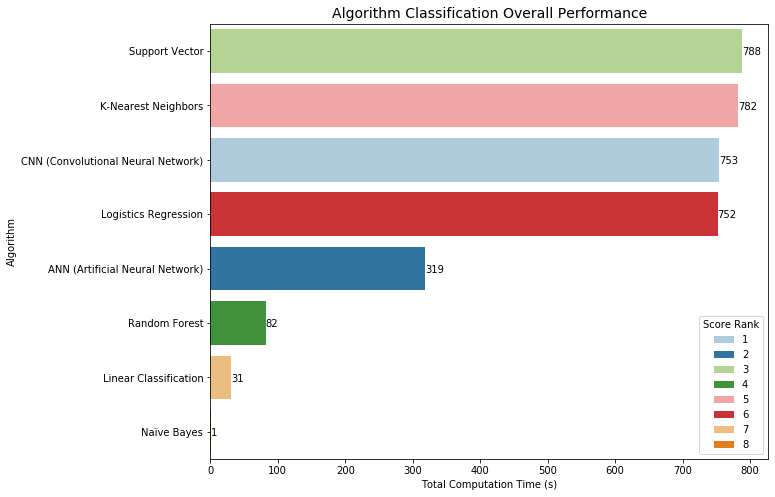

In [9]:
# Control plt figure size
plt.figure(figsize=(10,8))

# Plot the countplot
ax=sns.barplot(y='Algorithm', x='Total cost', data=performance_df, hue='Rank', palette=sns.color_palette("Paired"), dodge=False,
               order = performance_df.sort_values(by=['Total cost'], axis=0, ascending=False)['Algorithm'].values)

# set title of the plot, x-axis label, xticklabels, and legend
ax.set_title('Algorithm Classification Overall Performance', fontsize=14);
ax.legend(loc='lower right', title="Score Rank", fancybox=True)
ax.set_xlabel('Total Computation Time (s)')

# annotate the time of each column
for p in ax.patches:
    time = '{:.0f}'.format(p.get_width())
    x = p.get_x() + p.get_width()
    y = p.get_y() + p.get_height()/2
    ax.annotate(time, (x, y), ha='left', va='center_baseline')

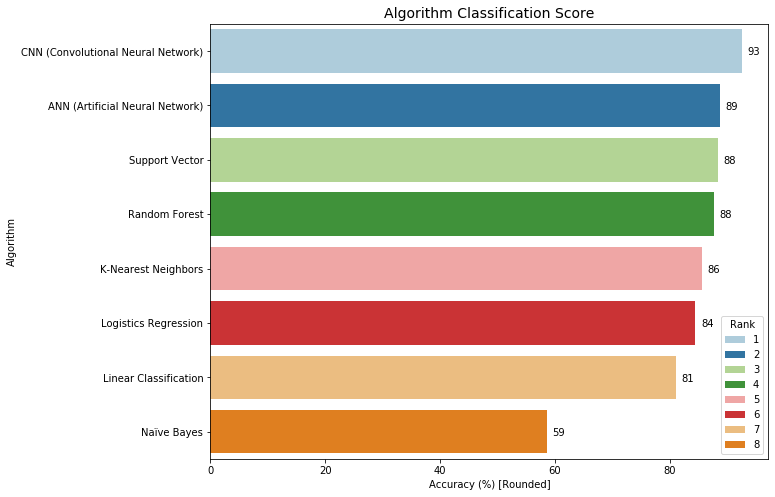

In [10]:
# Control plt figure size
plt.figure(figsize=(10,8))

# Plot the countplot
ax=sns.barplot(y='Algorithm', x='Score', data=performance_df, hue='Rank', palette=sns.color_palette("Paired"), dodge=False,
               order = performance_df.sort_values(by=['Score'], axis=0, ascending=False)['Algorithm'].values)

# set title of the plot, x-axis label, xticklabels, and legend
ax.set_title('Algorithm Classification Score', fontsize=14);
#ax.legend(loc='lower left', title="Score Rank", fancybox=True)
ax.set_xlabel('Accuracy (%) [Rounded]')

# annotate the time of each column
for p in ax.patches:
    time = '{:.0f}'.format(p.get_width())
    x = p.get_x() + p.get_width()
    y = p.get_y() + p.get_height()/2
    ax.annotate(time, (x+1, y), ha='left', va='center_baseline')

# Questions

What is the accuracy of each method?


In [11]:
performance_df.reset_index(drop=True)[['Algorithm','Score']]

,Algorithm,Score
0,CNN (Convolutional Neural Network),92.51
1,ANN (Artificial Neural Network),88.67
2,Support Vector,88.29
3,Random Forest,87.69
4,K-Nearest Neighbors,85.54
5,Logistics Regression,84.41
6,Linear Classification,81.03
7,Naïve Bayes,58.56


What are the trade-offs of each approach?


Each approach has its own advantage and disadvantage. 

Convolutional Neural Network works the best among others. However, it comes with the package that the computation cost on training could be higher depending on how deep the network is. Artificial Neural Network works the same but has less computation cost and slightly off on the accuracy since it cannot detect every aspect of features as Convolutional Neural Network does. 

Support Vector Machine (SVM) works effectively in classifying higher dimensional space and saves spaces on memory because it only uses the support vectors to create the optimal line. It is the best classifier when data points are separable. But, SVM performs poorly when the classes are overlapping, such as non-separable data points, and it is limited to small dataset. The bigger the training data, the higher the computation cost. Therefore, in our case, it has higher computation cost and higher accuracy rate.

Random forest has pretty good overall performance. It can handle both linear and non-linear data. But, one thing must be aware of. That is the higher depth of trees could bring the issue of the overfitting. 

K-Nearest Neighbors has higher computation cost on predicting It is not good for production since it requires more computation cost in predicting than training.

Logistic regression works fairly and it can be used in practice but it may require more computation cost. 

Linear classification works just fine on the fashion-MINST dataset, but its performance is depending on the dataset. Linear classification works better on linear dataset with scaled input.

Naïve Bayes is the simplest approach and known for faster computation compared to more sophisticated methods. When the training data contains continuous attribute, Gaussian Naïve Bayes is the choice. When the feature vectors represent frequencies, Multinomial Naïve Bayes should be implemented. When, the input variables are independent Booleans (binary variables), the Bernoulli Naïve Bayes is the tool to use. Overall, Naïve Bayes can perform will when the input variable is normally distributed and its predictors are independent to each other. But, clearly, it is not the case for our fashion-MINST dataset.


What is the compute performance of each approach?

In [12]:
performance_df.sort_values(by='Total cost', ascending=False).reset_index(drop=True)[['Algorithm','Training', 'Testing','Total cost']]

,Algorithm,Training,Testing,Total cost
0,Support Vector,579.6898,207.9156,787.6054
1,K-Nearest Neighbors,11.3533,771.0947,782.4480
2,CNN (Convolutional Neural Network),752.3904,1.0473,753.4377
3,Logistics Regression,751.8370,0.0300,751.8670
4,ANN (Artificial Neural Network),318.2523,0.4532,318.7055
5,Random Forest,81.6047,0.4056,82.0103
6,Linear Classification,31.0805,0.0357,31.1162
7,Naïve Bayes,0.6993,0.5419,1.2412


# Conclusion

The fashion-MINST dataset was used for the eight algorithms. Among the 10 classes, 'T-shirt/top', 'Trouser', 'Pullover', 'Dress',  'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag',  and 'Ankle boo', it is easy to find that ‘Shirt’ is the class that is hard to be classified by each of approaches. The reason could be that ‘Shirt’ shares the similar features with 'T-shirt/top’, ‘Pullover', and ‘Coat’. We can tell that by observing 'T-shirt/top’, ‘Pullover' and ‘Coat’ are not the top easy to be classified classes. ‘Trouser’ and ‘Bag’ are the classes that are easy to be classified because they have the clear features that are clearly different from others. In order to improve the ability of images recognition, the complicated neural network, Convolution Neural Network (CNN), should be built deeper for learning the varies of features with feature detector.